In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
sns.set_style('darkgrid')

In [3]:
n = 1000
a = 5
b = 1
noise = np.random.normal(0, 2, n)
x = np.random.uniform(0, 5, n)
y = a * x + b + noise

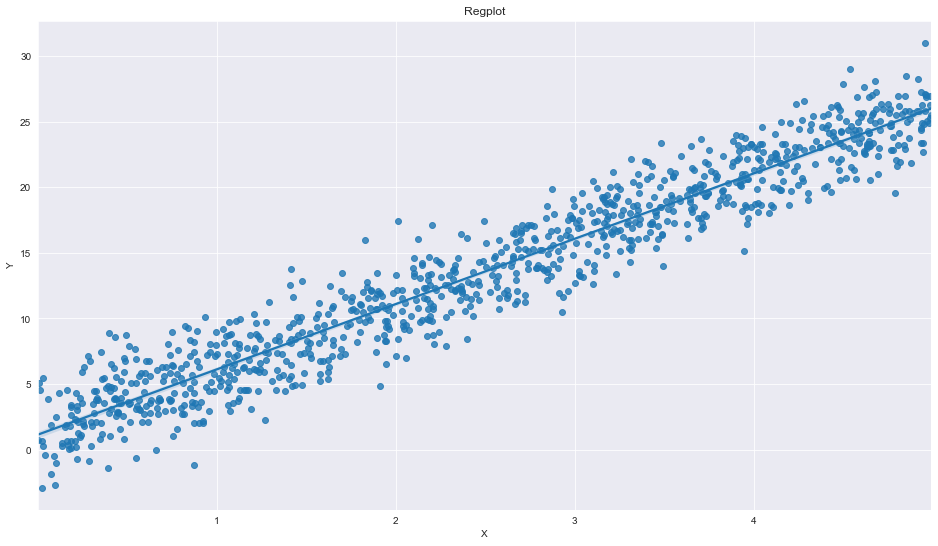

In [4]:
figure = plt.figure(figsize=(16, 9))
sns.regplot(x=x, y=y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regplot')
plt.show()

In [5]:
def grad_desc(x, y):
    a1, b1 = 1, 1
    alpha = 0.1
    m = len(x)
    for i in range(500):
        a1 = a1 + alpha * 1 / m * np.sum((y - (x * a1 + b1)) * x)
        b1 = b1 + alpha * 1 / m * np.sum((y - (x * a1 + b1)))
    return a1, b1

In [6]:
a1, b1 = grad_desc(x, y)

In [7]:
print(a, a1, b, b1)

5 4.98103889317778 1 1.127352033589291


# Task 2

In [8]:
m1, m2 = [1, 3], [-3, 0]
c1, c2 = [[2, -1], [-1, 1]], [[2, 0], [0, 3]]
        
n = 300

In [10]:
x1 = np.random.multivariate_normal(m1, c1, n)
x2 = np.random.multivariate_normal(m2, c2, n)
X = np.concatenate([x1, x2])
Y = np.array([0] * n + [1] * n)

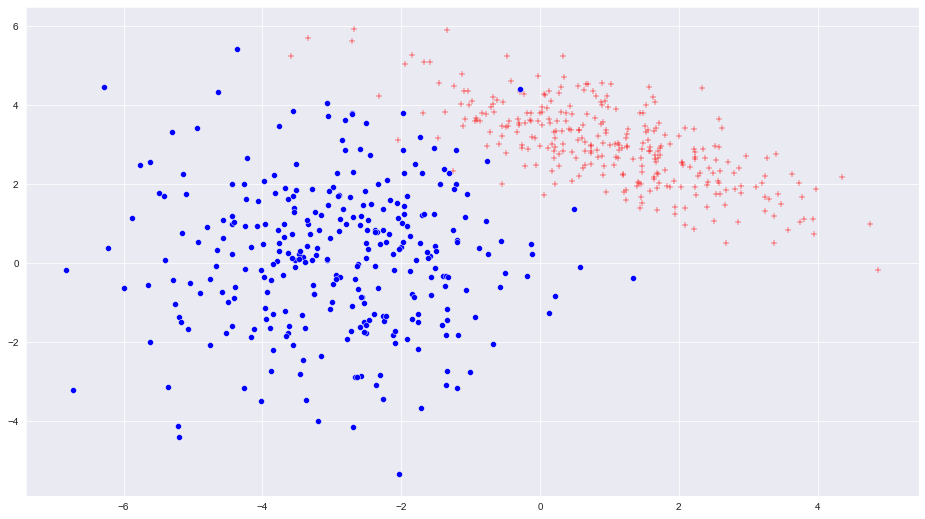

In [11]:
figure = plt.figure(figsize=(16, 9))
sns.scatterplot(x=x1[:, 0], y=x1[:, 1], marker = '+', color='r')
sns.scatterplot(x=x2[:, 0], y=x2[:, 1], marker = 'o', color='b')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [14]:
def grad_desc(X, Y, a, b):
    y1 = sigmoid(X.dot(a) + b)
    cost = -(Y * np.log(y1) + (1 - Y) * np.log(1 - y1)).mean()  
    da = np.dot(X.T, (y1 - Y)) / len(X)
    db = np.sum(y1 - Y) / len(X)
    cost = np.squeeze(cost)
    return da, db, cost

In [15]:
def predict(X, a, b):
    y_temp = sigmoid(np.dot(X, a) + b)
    return np.where(y_temp >= 0.5, 1, 0)

In [16]:
a = np.zeros(X.shape[1])
b = 0
alpha = 0.1
for _ in range(500):
    da, db, cost = grad_desc(X_train, y_train, a, b)
    a = a - alpha * da
    b = b - alpha * db

In [17]:
predictions = predict(X_test, a, b)

In [18]:
accuracy_score(predictions, y_test)

0.9666666666666667